In [10]:
pip install wordcloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Model: Logistic Regression
Accuracy: 0.9039
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1862
           1       0.90      0.57      0.70       447

    accuracy                           0.90      2309
   macro avg       0.90      0.78      0.82      2309
weighted avg       0.90      0.90      0.89      2309



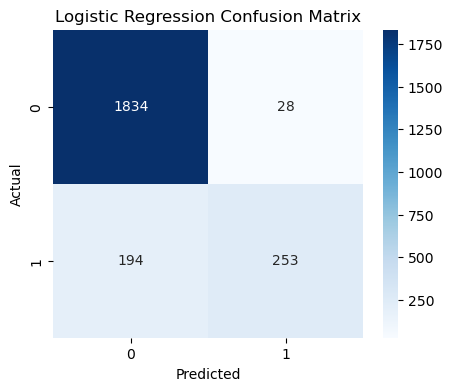


Model: Naive Bayes
Accuracy: 0.8809
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1862
           1       0.94      0.41      0.57       447

    accuracy                           0.88      2309
   macro avg       0.91      0.70      0.75      2309
weighted avg       0.89      0.88      0.86      2309



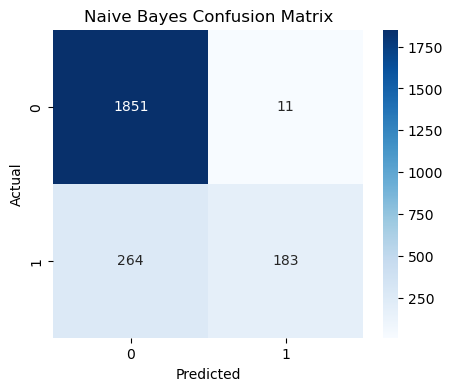

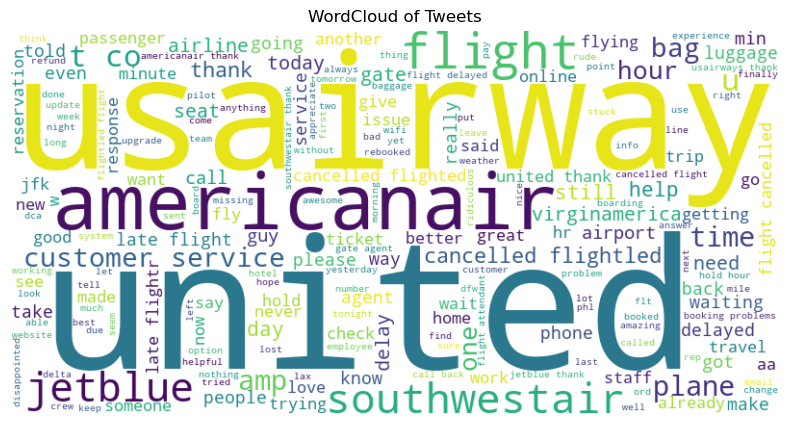

In [15]:
# sentiment_analysis.py

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from wordcloud import WordCloud

# Download stopwords if not already downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv('Tweets.csv')

# Preview columns
print("Columns:", df.columns)

# Text preprocessing
stop_words = set(stopwords.words('english'))
df['review_clean'] = df['text'].str.lower()
df['review_clean'] = df['review_clean'].str.replace(r'<.*?>', '', regex=True)
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Sentiment mapping (binary classification: positive vs negative)
df = df[df['airline_sentiment'] != 'neutral']
df['sentiment'] = df['airline_sentiment'].map({'positive':1, 'negative':0})

# Drop rows with nulls after filtering
df = df.dropna(subset=['review_clean', 'sentiment'])

# Feature extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review_clean']).toarray()
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluation function
def evaluate(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models
evaluate(y_test, y_pred_lr, "Logistic Regression")
evaluate(y_test, y_pred_nb, "Naive Bayes")

# Wordcloud
text = " ".join(df['review_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Tweets")

plt.show()
